In [1]:
import warnings
warnings.filterwarnings('ignore')

# import os
# import numpy as np

# import ipywidgets as widgets
# from ipywidgets import interactive
# from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib notebook

import imars3d
print(f"Using imarsd version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

Using imarsd version 1.1.0.dev253


** Using Debugging Mode! **


In [2]:
%gui qt

# Select input data 

## raw data

In [3]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
# o_imars3dui = Imars3dui(working_dir="/Users/j35/HFIR/CG1D/IPTS-31148")
o_imars3dui.select_raw()

raw folder selected: ['/Users/j35/HFIR/CG1D/IPTS-31148/ct_scans/December3_2022'] with 1288 files)


## ob 

In [4]:
o_imars3dui.select_ob()

ob folder selected: ['/Users/j35/HFIR/CG1D/IPTS-31148/ob/December2_2022', '/Users/j35/HFIR/CG1D/IPTS-31148/ob/December3_2022'] with 20 files)


## dc 

In [5]:
o_imars3dui.select_dc()

dc folder selected: ['/Users/j35/HFIR/CG1D/IPTS-31148/dc/2022_12_05'] with 10 files)


In [ ]:
# for debugging only

# o_imars3dui.input_data_folders = {'raw': ['/Users/j35/HFIR/CG1D/IPTS-31148/ct_scans/December3_2022'],
#                                   'ob': ['/Users/j35/HFIR/CG1D/IPTS-31148/ob/December2_2022', '/Users/j35/HFIR/CG1D/IPTS-31148/ob/December3_2022'],
#                                   'dc': ['/Users/j35/HFIR/CG1D/IPTS-31148/dc/2022_12_05']}

# o_imars3dui.saving_list_of_files()

# Load data 

ct:   0%|          | 0/1288 [00:00<?, ?it/s]

ob:   0%|          | 0/20 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


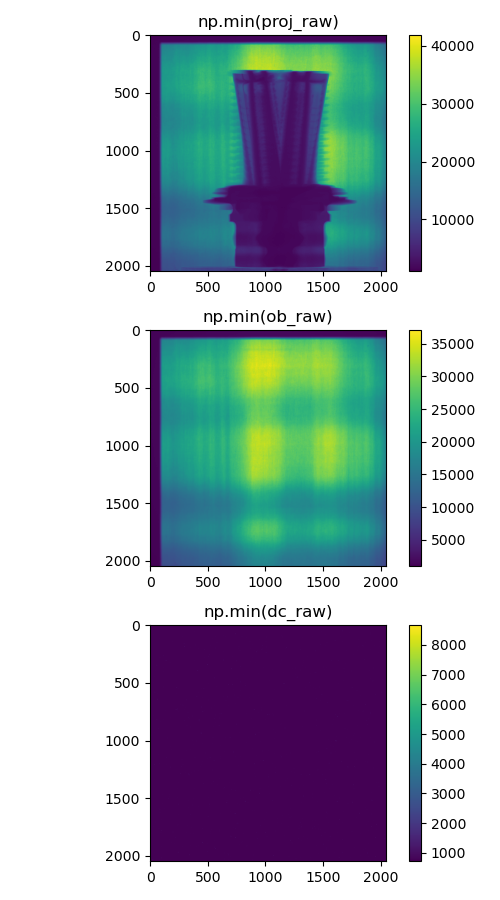

In [6]:
o_imars3dui.load_and_display_data()

# Crop 

In [7]:
o_gui = Interface(o_imars3dui=o_imars3dui,
                  mode='crop',
                  callback=o_imars3dui.crop_and_display_data)
o_gui.show()

Running crop ...
cropping done!


# gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [8]:
o_imars3dui.gamma_filtering()

Running gamma filtering ...
Gamma filtering done in 86.22s


# normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 43.63s


<IPython.core.display.Javascript object>


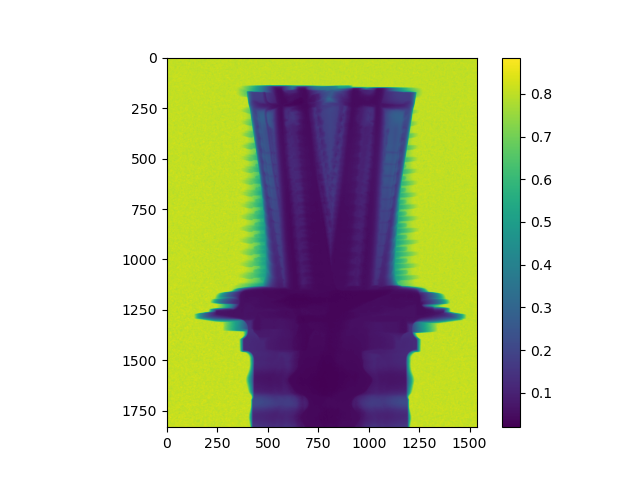

In [9]:
o_imars3dui.normalization_and_display()

# beam fluctuation correction

Select a region that does not contain the sample to improve the normalization

<IPython.core.display.Javascript object>


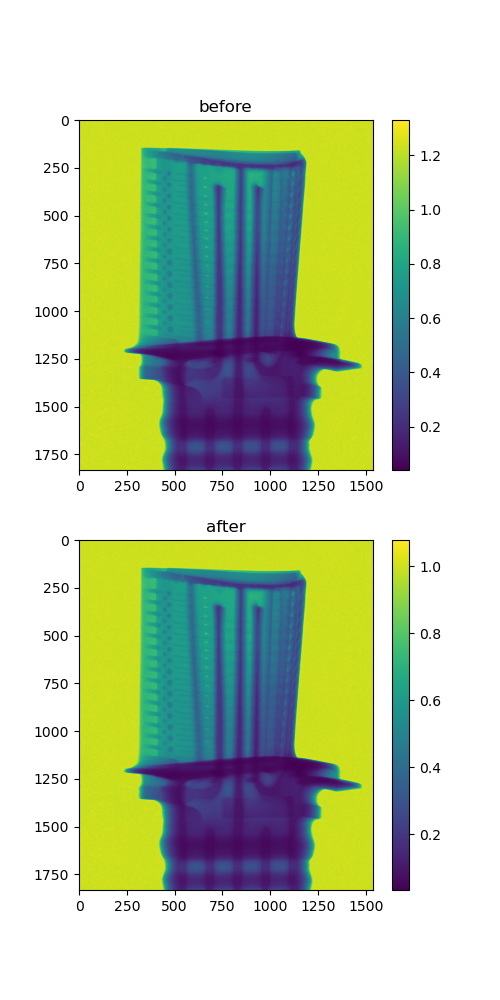

In [10]:
o_gui = Interface(o_imars3dui=o_imars3dui,
                  mode='background',
                  callback=o_imars3dui.beam_fluctuation_correction)
o_gui.show()

# attenuation to transmission

<IPython.core.display.Javascript object>


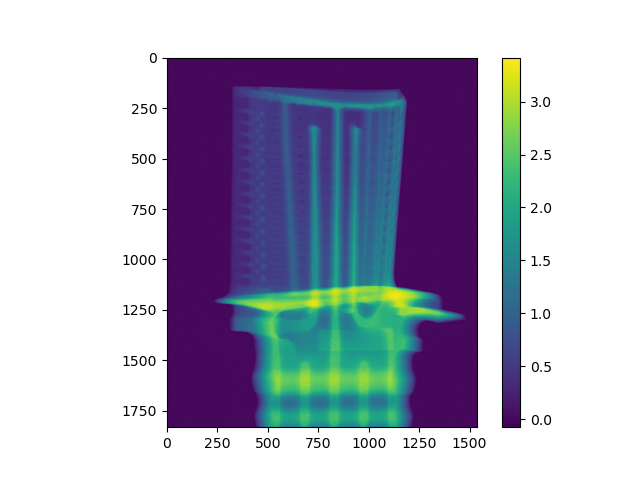

In [11]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Looking at 180 degrees pairs indexes!
Calculating tilt ...
   tilt angle: 0.03
Applying tilt correction ...


Applying tilt corr:   0%|          | 0/1288 [00:00<?, ?it/s]

 tilt correction done!


<IPython.core.display.Javascript object>


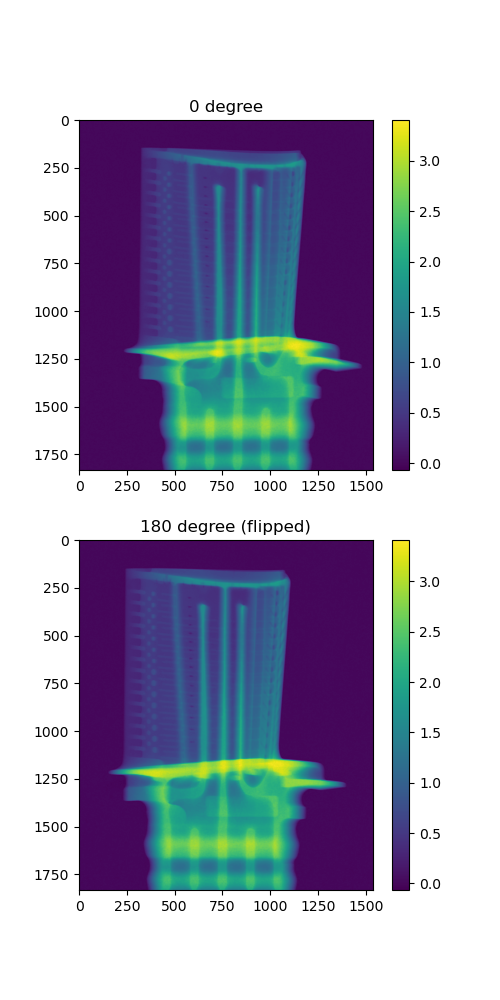

In [12]:
o_imars3dui.tilt_correction_and_display()

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [13]:
o_imars3dui.rotation_center()

Running rotation center ...


Finding rotation center:   0%|          | 0/1 [00:00<?, ?it/s]

rotation center found in 9.32s
 - value: (808.25,)


# Strikes removal (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

### using imars3d - ketcham method working on 3D stack

In [14]:
o_imars3dui.strikes_removal()

Running strikes removal ...


Removing ring artifact:   0%|          | 0/1832 [00:00<?, ?it/s]

 strikes removal done!
time= 97.41s


# Reconstruction 

Running reconstruction ...
 reconstruction done!
time= 36.75s


<IPython.core.display.Javascript object>


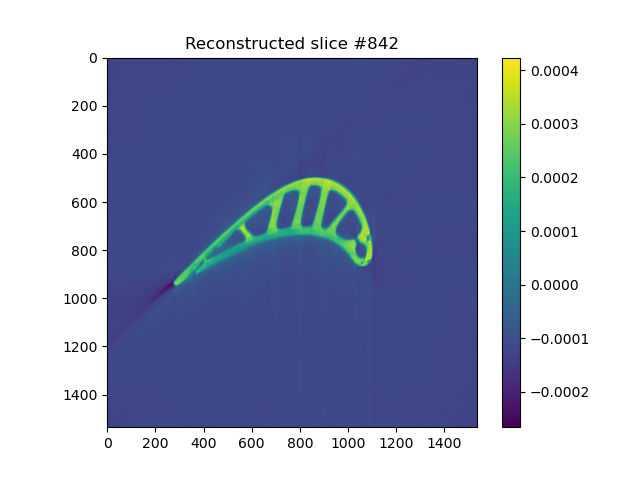

interactive(children=(IntSlider(value=0, description='index', max=1832), Output()), _dom_classes=('widget-inte…

In [15]:
o_imars3dui.reconstruction_and_display()

# Export


In [16]:
o_imars3dui.export()

/Users/j35/HFIR/CG1D/IPTS-31148/shared/processed_data/.
